In [1]:
#Importing Required libraries for Analysis and Prediction
import numpy as np
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

C:\Users\MA20092444\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('bike_sharing.csv')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.drop(['instant','dteday'],axis=1,inplace=True)

In [6]:
data['season']=data['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
data['weathersit']=data['weathersit'].map({1:'weathersit_1',2:'weathersit_2',3:'weathersit_3',4:'weathersit_4'})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
data['weathersit'].value_counts()

weathersit_1    463
weathersit_2    246
weathersit_3     21
Name: weathersit, dtype: int64

In [9]:
data['mnth']=data['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,6,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,0,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,1,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,2,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,3,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


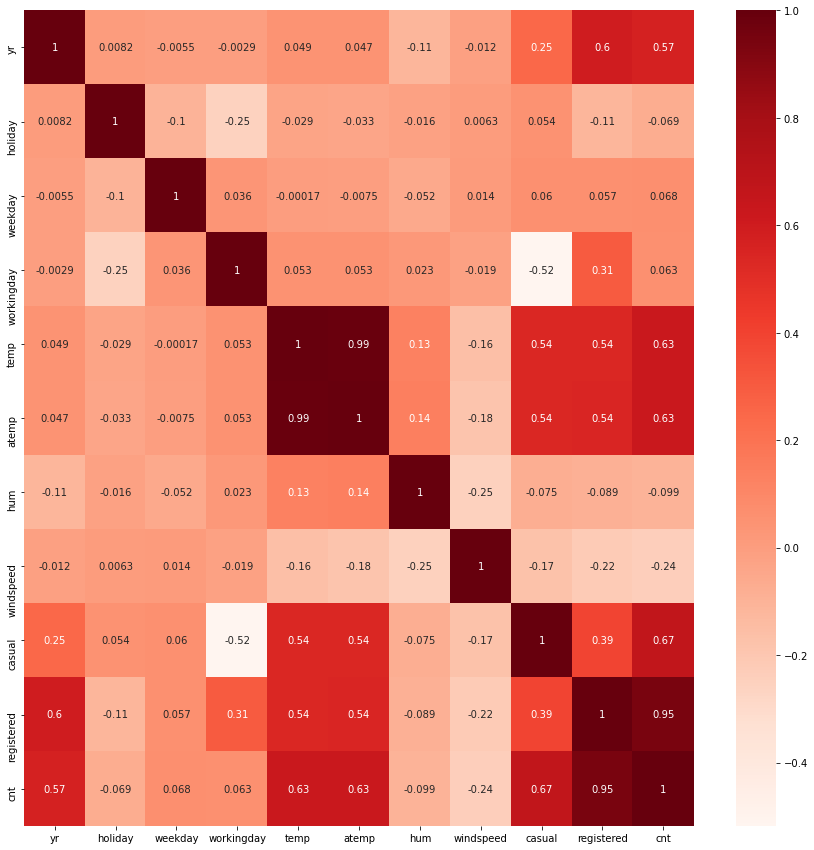

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap='Reds',annot=True)
plt.show()

In [11]:
season=pd.get_dummies(data['season'],drop_first=True)
season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [12]:
data=pd.concat([data,season],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,spring,0,Jan,0,6,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,spring,0,Jan,0,0,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,spring,0,Jan,0,1,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,spring,0,Jan,0,2,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,spring,0,Jan,0,3,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [13]:
data.drop('season',axis=1,inplace=True)

In [14]:
weathersit=pd.get_dummies(data['weathersit'],drop_first=True)
weathersit

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [15]:
data=pd.concat([data,weathersit],axis=1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,weathersit_2,weathersit_3
0,0,Jan,0,6,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0
1,0,Jan,0,0,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,1,0
2,0,Jan,0,1,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,Jan,0,2,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,0,Jan,0,3,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [16]:
data.drop('weathersit',axis=1,inplace=True)

In [17]:
mnth=pd.get_dummies(data['mnth'],drop_first=True)
mnth

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [18]:
data=pd.concat([data,mnth],axis=1)
data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,Jan,0,6,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,1,0,0,0,0,0,0,0


In [19]:
data.drop('mnth',axis=1,inplace=True)
data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


In [68]:
df_train,df_test=train_test_split(data,train_size=0.7,random_state=100)
print(df_train.shape)

(510, 27)


In [69]:
num_vars=['cnt','temp','atemp','hum','windspeed','casual','registered']
scaler=MinMaxScaler()
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\MA20092444\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MA20092444\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,1,0,2,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,...,0,0,0,1,0,0,0,0,0,0
426,1,0,6,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,...,1,0,0,0,0,0,0,0,0,0
482,1,0,6,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,...,0,0,0,0,0,0,0,0,0,0
111,0,0,5,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y_train=df_train.pop('cnt')
x_train=df_train[['temp','yr','holiday','spring','summer','winter','weathersit_2','weathersit_3','Aug','Sep']]

In [71]:
##Batch Gradient Descent
alpha=0.01
x_train['constant']=1
x_train.head()

C:\Users\MA20092444\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,temp,yr,holiday,spring,summer,winter,weathersit_2,weathersit_3,Aug,Sep,constant
576,0.815169,1,0,0,0,0,0,0,0,0,1
426,0.442393,1,0,1,0,0,1,0,0,0,1
728,0.245101,1,0,1,0,0,0,0,0,0,1
482,0.395666,1,0,0,1,0,1,0,0,0,1
111,0.345824,0,0,0,1,0,1,0,0,0,1


In [88]:
np.random.seed(69)
thetha=np.random.rand(11)
iteration=2000
past_cost=[]
past_thetha=[]
for i in range(iteration):
    predict=np.dot(x_train,thetha)
    #print(predict.shape)
    err=y_train-predict
    cost=(1/(2*510))*sum((err)**2)
    #print(cost)
    cost1=(1/(2*510))*np.dot(err,err.T)
    #print(cost1)
    past_cost.append(cost1)
    grad=(1/510)*np.dot(x_train.T,err)
    thetha=thetha+(alpha*grad)
    #print(thetha)
    past_thetha.append(thetha)
print(cost1)
print(thetha)

0.01114516985369454
[ 0.25828816  0.24522045  0.15659711  0.10626336  0.3081013   0.26591019
 -0.10444349 -0.09443723  0.40738715  0.41107595  0.0446714 ]


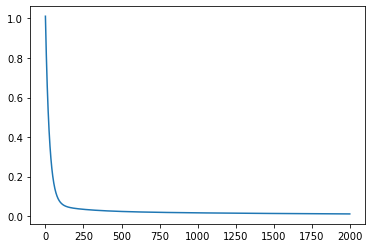

In [89]:
plt.plot(past_cost)

In [90]:
prediction=np.dot(x_train,thetha)
prediction

array([0.50044023, 0.40597659, 0.45946192, 0.59574555, 0.33765151,
       0.93357456, 0.78386737, 0.73237301, 0.62363811, 0.61156912,
       1.12244553, 0.54931285, 0.75329259, 0.53932346, 0.85787644,
       0.77844131, 0.52765062, 0.61103293, 0.55661619, 0.65751125,
       0.55274984, 0.69366839, 0.63225075, 0.2970696 , 0.80049554,
       0.41006545, 0.50955924, 0.748465  , 0.27399398, 0.4819907 ,
       0.45622584, 0.63624361, 0.49051131, 0.25870659, 0.80228367,
       0.56830158, 0.4911097 , 0.9121188 , 0.80170891, 0.61910875,
       0.3957849 , 0.49620539, 0.20646389, 0.61363097, 0.63248783,
       0.94931507, 0.51653222, 0.84946091, 0.905682  , 0.63793277,
       0.88717622, 0.53853515, 0.53703772, 0.38070935, 0.53811041,
       0.77474836, 0.63873737, 0.54818   , 0.70466469, 0.34268134,
       0.40634069, 0.62390652, 0.16531533, 0.54604463, 0.80170891,
       0.63761454, 0.54904476, 0.37672493, 0.51090002, 1.066236  ,
       0.39212599, 0.89656299, 0.09294805, 0.54282623, 0.47454

In [91]:
r2=r2_score(y_train,prediction)

In [92]:
r2

0.5567032821708668

In [93]:
np.dot(x_train.iloc[1],thetha)

0.40597659471249353

In [ ]:
np.random.seed(69)
thetha=np.random.rand(11)
iteration=2000
past_cost=[]
past_thetha=[]
for i in range(iteration):
    for j in range(510):
        predict=np.dot(x_train.iloc[j],thetha)
        err=y_train[j]-predict
        